In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=df.drop(columns='Id')

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#there are no null values
#type casting not needed

<Figure size 864x576 with 0 Axes>

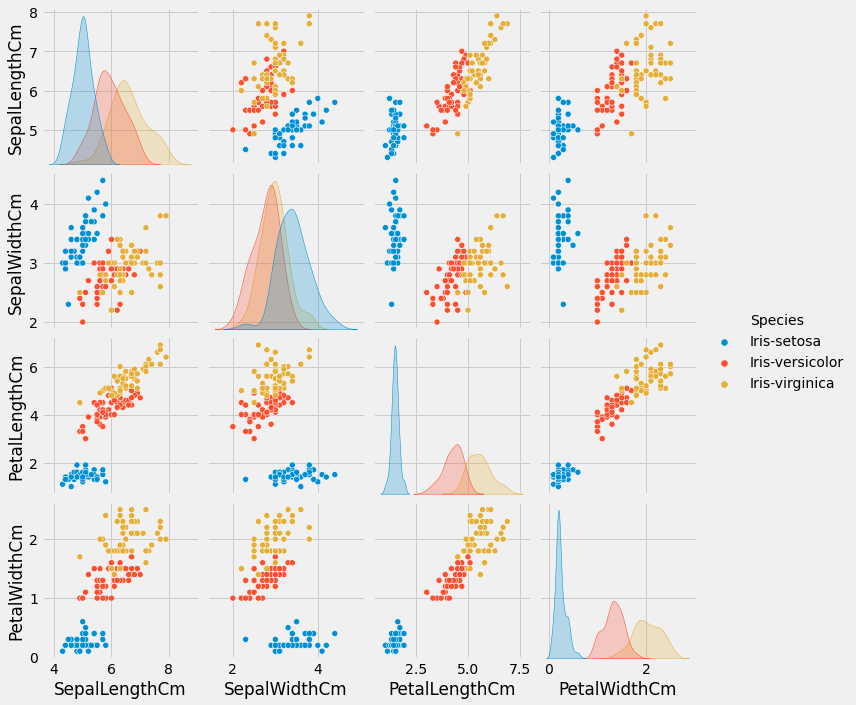

In [6]:
#how original clusters looking
plt.figure(figsize=(12,8))
sns.pairplot(df,hue='Species')
plt.show()

In [ ]:
#clusters are not well separated, iris-versicolor and iris virginica has overlap

# Kmeans clustering

Data Preparation

In [8]:
x=df.drop(columns='Species')

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss=StandardScaler()

In [22]:
#as it is distance based algorithm,standardizing is important
xstd=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [12]:
from sklearn.cluster import KMeans

Optimal k

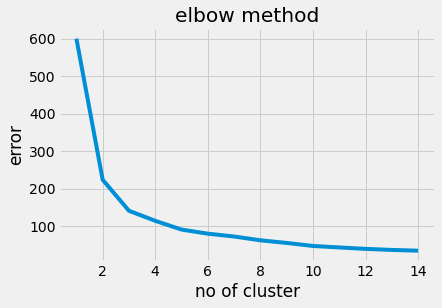

In [23]:
#elbow plot
err=[]
for i in range(1,15):
    km=KMeans(n_clusters=i,random_state=10)
    km.fit(xstd)
    err.append(km.inertia_)
plt.plot(range(1,15),err)
plt.xlabel('no of cluster')
plt.ylabel('error')
plt.title('elbow method')
plt.show()
    


In [ ]:
#from elbow plot we can see the bend at 2
#we can confirm it with silhoutte score as well

In [17]:
from sklearn.metrics import silhouette_score

In [24]:
for i in range(2,8):
    km=KMeans(i,random_state=10)
    print('for cluster{} :silhoutte score{}'.format(i,silhouette_score(xstd,km.fit_predict(xstd))))

for cluster2 :silhoutte score0.580184463257396
for cluster3 :silhoutte score0.46214947389312017
for cluster4 :silhoutte score0.38686030299599405
for cluster5 :silhoutte score0.34478573455929096
for cluster6 :silhoutte score0.3259365058730077
for cluster7 :silhoutte score0.3346062225960434


In [ ]:
#from silhoutte score also we can see the optimal cluster is 2

# Kmeans clustering with 2 cluster

In [25]:
km=KMeans(n_clusters=2,random_state=10)
km.fit(xstd)

KMeans(n_clusters=2, random_state=10)

In [27]:
xstd['label']=km.labels_

In [29]:
xstd.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


In [28]:
#for comparing original cluster and kmeans clustering asign labels to original data instead of scaled data
x['label']=km.labels_

In [31]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


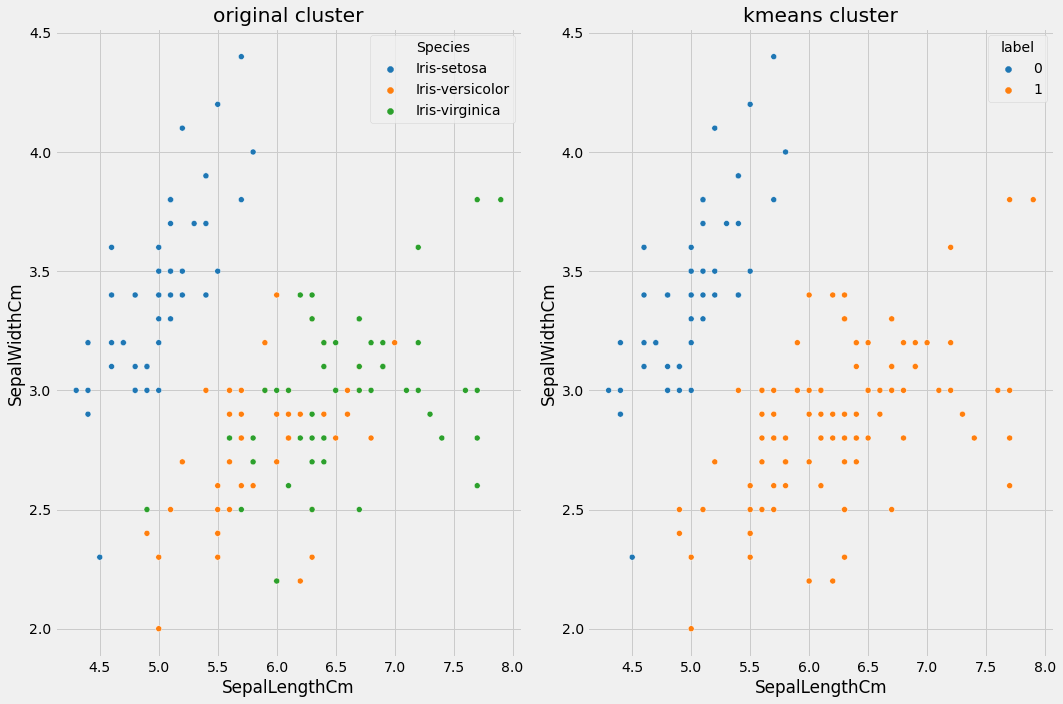

In [37]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(1,2,1)
sns.scatterplot(x=df['SepalLengthCm'],y=df['SepalWidthCm'],hue=df['Species'],ax=ax1,palette='tab10')
plt.title('original cluster')
ax2=plt.subplot(1,2,2)
sns.scatterplot(x=x['SepalLengthCm'],y=x['SepalWidthCm'],hue=x['label'],ax=ax2,palette='tab10')
plt.title('kmeans cluster')
plt.tight_layout()
plt.show()

In [ ]:
#from plot we can observe kmeans clusters are well separated